In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [53]:
#Loading data

In [54]:
with open('trainX.pickle', 'rb') as f:
    Xtrain = pickle.load(f)
    
with open('trainY.pickle', 'rb') as f:
    Ytrain = pickle.load(f)
    
with open('testX.pickle', 'rb') as f:
    Xtest = pickle.load(f)

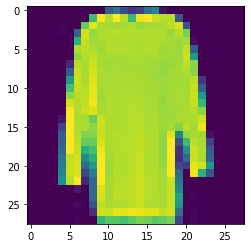

In [82]:
plt.imshow(Xtrain[350,:].reshape((28,28)))

In [55]:
#Splitting dataset

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test,y_train,y_test= train_test_split(Xtrain,Ytrain,test_size=0.2,random_state=1)

In [58]:
batch_size = 128
num_classes = 10
epochs =10

In [59]:
#Scaling and preprocessing data

In [60]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (48000, 28, 28)
48000 train samples
12000 test samples


In [61]:
#Reshaping

In [63]:
x_train = np.reshape(x_train, (48000, 784))
x_test = np.reshape(x_test, (12000, 784))
x_train.shape

(48000, 784)

In [64]:
#Designing model

In [65]:
model = Sequential()

model.add(Dense(500, input_dim=784), )
model.add(Activation('relu'))
#model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_19 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               150300    
_________________________________________________________________
activation_20 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                3010      
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Fitting model

In [67]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 264us/step - loss: 0.5859 - acc: 0.7873 - val_loss: 0.4245 - val_acc: 0.8455
Epoch 2/10
48000/48000 [==============================] - 10s 211us/step - loss: 0.4029 - acc: 0.8512 - val_loss: 0.3940 - val_acc: 0.8517
Epoch 3/10
48000/48000 [==============================] - 10s 208us/step - loss: 0.3548 - acc: 0.8672 - val_loss: 0.3677 - val_acc: 0.8661
Epoch 4/10
48000/48000 [==============================] - 11s 235us/step - loss: 0.3281 - acc: 0.8781 - val_loss: 0.3489 - val_acc: 0.8713
Epoch 5/10
48000/48000 [==============================] - 10s 215us/step - loss: 0.3042 - acc: 0.8850 - val_loss: 0.3208 - val_acc: 0.8795
Epoch 6/10
48000/48000 [==============================] - 10s 212us/step - loss: 0.2867 - acc: 0.8930 - val_loss: 0.3291 - val_acc: 0.8757
Epoch 7/10
48000/48000 [==============================] - 10s 208us/step - loss: 0.2698 - acc: 0.8979 - val_loss: 0.

In [68]:
#Accuracy is 89.2

In [69]:
model = Sequential()
im_shape = (28,28,1)

model.add(Conv2D(32, (3, 3), padding="same",
input_shape=im_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

W0624 02:50:04.999464 12860 deprecation_wrapper.py:119] From c:\programdata\miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0624 02:50:06.088560 12860 deprecation_wrapper.py:119] From c:\programdata\miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0624 02:50:06.146398 12860 deprecation.py:506] From c:\programdata\miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [75]:
im_shape = (28,28,1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
Xtest = Xtest.reshape((Xtest.shape[0], 28, 28, 1))

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
Xtest = Xtest.astype("float32") / 255.0

In [71]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 982s 20ms/step - loss: 0.5356 - acc: 0.8191 - val_loss: 0.3507 - val_acc: 0.8728
Epoch 2/10
48000/48000 [==============================] - 910s 19ms/step - loss: 0.3318 - acc: 0.8797 - val_loss: 0.2742 - val_acc: 0.8993
Epoch 3/10
48000/48000 [==============================] - 503s 10ms/step - loss: 0.2831 - acc: 0.8975 - val_loss: 0.2719 - val_acc: 0.8988
Epoch 4/10
48000/48000 [==============================] - 463s 10ms/step - loss: 0.2601 - acc: 0.9048 - val_loss: 0.2577 - val_acc: 0.9042
Epoch 5/10
48000/48000 [==============================] - 399s 8ms/step - loss: 0.2427 - acc: 0.9109 - val_loss: 0.2621 - val_acc: 0.9072
Epoch 6/10
48000/48000 [==============================] - 419s 9ms/step - loss: 0.2251 - acc: 0.9178 - val_loss: 0.2400 - val_acc: 0.9148
Epoch 7/10
48000/48000 [==============================] - 417s 9ms/step - loss: 0.2120 - acc: 0.9207 - val_loss: 0.263

In [79]:
preds = model.predict(x_test)
 
print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1166
           1       0.00      0.00      0.00      1213
           2       0.00      0.00      0.00      1232
           3       0.00      0.00      0.00      1209
           4       0.00      0.00      0.00      1159
           5       0.10      1.00      0.18      1217
           6       0.00      0.00      0.00      1178
           7       0.00      0.00      0.00      1215
           8       0.00      0.00      0.00      1178
           9       0.00      0.00      0.00      1233

    accuracy                           0.10     12000
   macro avg       0.01      0.10      0.02     12000
weighted avg       0.01      0.10      0.02     12000



c:\programdata\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
 Predict = model.predict(Xtest)

In [83]:
with open("testY.pickle", 'wb') as f:
  pickle.dump(Predict, f)